### 필수과제1
- 본인이 생각하는 y값과 연관이 있는 피처들은 무엇인지에 대한 기준을 정해서 정리해 주세요!
- 코드로 시각화 및 통계적인 분석 등 다양하게 접근하셔서
- Y값과 컬럼들간의 유의미한 차이를 확인해 주세요!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_bk.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# datetime 컬럼을 기준으로 date, year, month, day, hour 컬럼 생성
from datetime import datetime
import calendar
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
train['year'] = train['datetime'].apply(lambda x:x.split('-')[0])
train['month'] = train['date'].apply(lambda x: x.split('-')[1])
train['day'] = train['date'].apply(lambda x: x.split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04


In [7]:
from datetime import datetime
import calendar

train['weekday'] = train['date'].apply(lambda dateString:calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()])

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,Saturday


## 범주형 자료
- season, workingday, weather, year, month, weekday, hour

### season

In [31]:
season_m = train.groupby('season')['count'].mean().reset_index()

- 1: 겨울, 2: 봄, 3: 여름, 4: 가을


Text(0, 0.5, 'count')

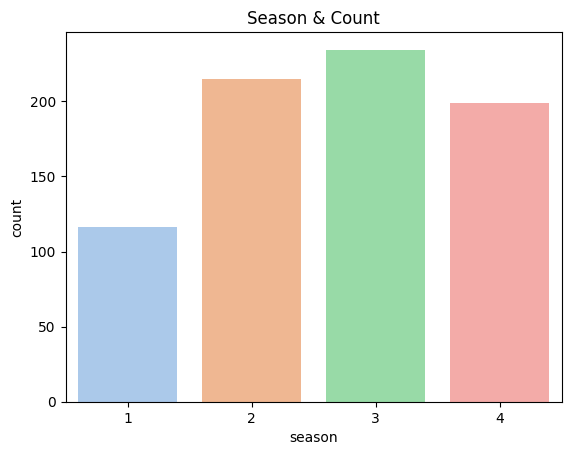

In [20]:
sns.barplot(x='season',y='count',palette='pastel', data=season_m)
plt.title('Season & Count')
plt.xlabel('season')
plt.ylabel('count')

- 추운 겨울을 제외하고 봄, 여름, 가을의 수가 높으나 여름에 특히 높은것을 볼 수 있다.

### workingday

In [21]:
working_m = train.groupby('workingday')['count'].mean().reset_index()
working_m

,workingday,count
0,0,188.506621
1,1,193.011873


Text(0, 0.5, 'count')

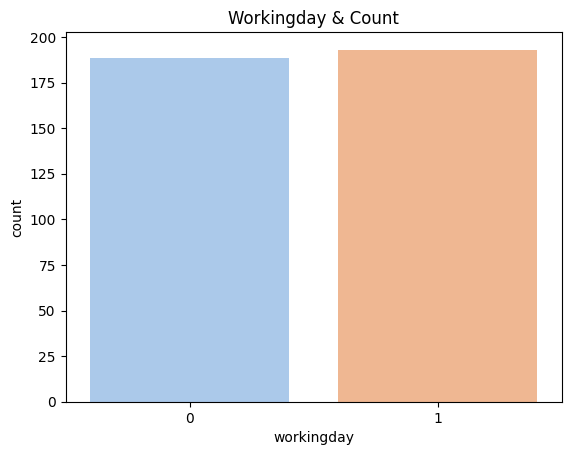

In [23]:
sns.barplot(x='workingday',y='count',palette='pastel', data=working_m)
plt.title('Workingday & Count')
plt.xlabel('workingday')
plt.ylabel('count')

- 휴무일과 관계없이 둘다 많이 빌리는 것으로 볼 수 있다. 차이가 거의 없음

### weather

In [24]:
weather_m = train.groupby('weather')['count'].mean().reset_index()
weather_m

,weather,count
0,1,205.236791
1,2,178.955540
2,3,118.846333
3,4,164.000000


Text(0, 0.5, 'count')

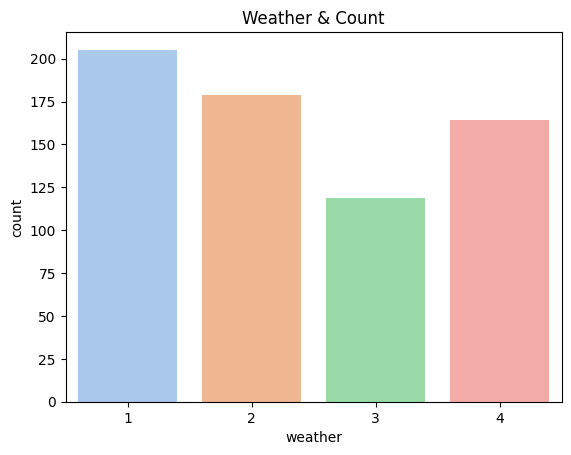

In [25]:
sns.barplot(x='weather',y='count',palette='pastel', data=weather_m)
plt.title('Weather & Count')
plt.xlabel('weather')
plt.ylabel('count')

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
-2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
  
1,2의 경우 많이 타는 것을 당연하게 생각할 수 있으나 4번의 경우도 꽤 많이 탄다는 것을 알 수 있다.

### year

In [26]:
year_m = train.groupby('year')['count'].mean().reset_index()
year_m

,year,count
0,2011,144.223349
1,2012,238.560944


Text(0, 0.5, 'count')

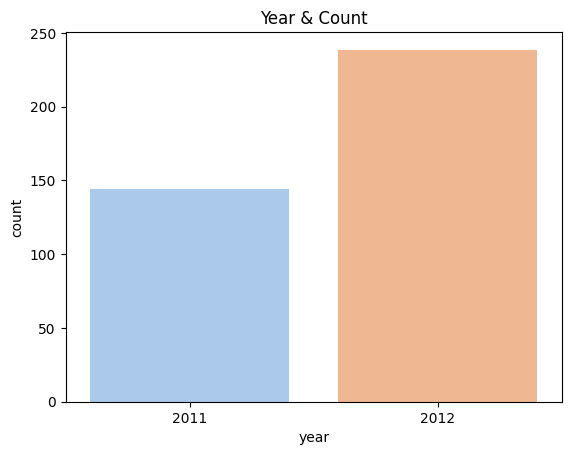

In [27]:
sns.barplot(x='year',y='count',palette='pastel', data=year_m)
plt.title('Year & Count')
plt.xlabel('year')
plt.ylabel('count')

작년에 비해 평균이 대략 100정도 오른 것을 볼 수 있다. 이 경우 자전거 대여업체가 많아진 것인지, 기름값 상승인지 등 외부요인을 살펴보면 좋을 것 같다.

### month

In [28]:
month_m = train.groupby('month')['count'].mean().reset_index()
month_m

,month,count
0,01,90.366516
1,02,110.003330
2,03,148.169811
3,04,184.160616
4,05,219.459430
5,06,242.031798
6,07,235.325658
7,08,234.118421
8,09,233.805281
9,10,227.699232


Text(0, 0.5, 'count')

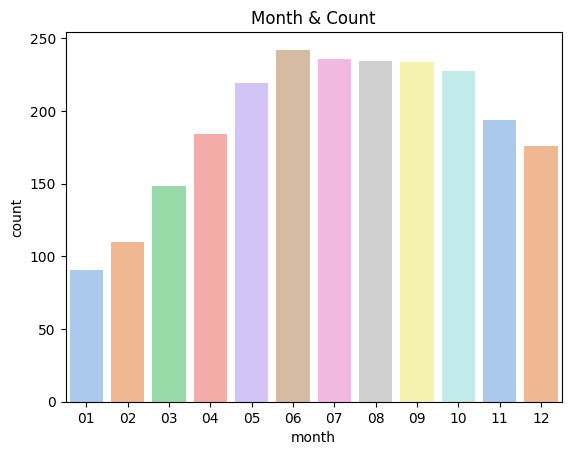

In [29]:
sns.barplot(x='month',y='count',palette='pastel', data=month_m)
plt.title('Month & Count')
plt.xlabel('month')
plt.ylabel('count')

앞의 season과 유사하다. 조금 더 자세히 들여보자면, 여름 중에선 초여름인 6월이 가장 값이 크고, 가을 중에서도 초가을이 가장 값이 크다. 봄의 경우 여름과 가까운 늦봄이 가장 크다.

### weekday

In [32]:
weekday_m = train.groupby('weekday')['count'].mean().reset_index()
weekday_m

,weekday,count
0,Friday,197.844343
1,Monday,190.390716
2,Saturday,196.665404
3,Sunday,180.839772
4,Thursday,197.296201
5,Tuesday,189.723847
6,Wednesday,188.411348


Text(0, 0.5, 'count')

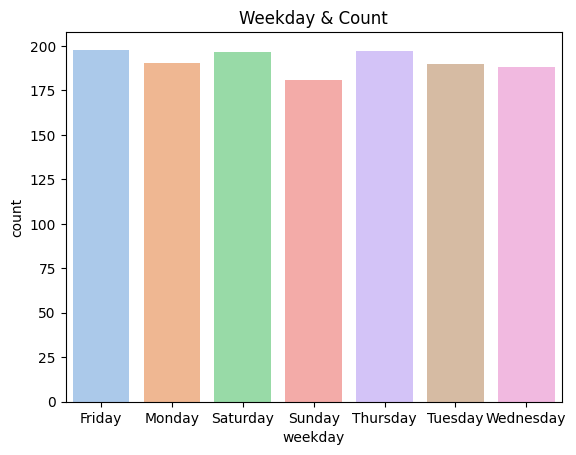

In [33]:
sns.barplot(x='weekday',y='count',palette='pastel', data=weekday_m)
plt.title('Weekday & Count')
plt.xlabel('weekday')
plt.ylabel('count')

어느 요일에 특정하지 않고 골고루 탄다는 것을 볼 수 있다. 그러나 눈에 띄게 금요일, 토요일, 목요일이 가장 값이 크고 이 세 요일이 비슷한 값을 가진다는 것을 볼 수 있다. 반대로 일요일이 가장 적은 수를 가진다는 것을 볼 수 있다.

### hour


In [42]:
hour_m = train.groupby('hour')['count'].mean().reset_index()
hour_m

,hour,count
0,00,55.138462
1,01,33.859031
2,02,22.899554
3,03,11.757506
4,04,6.407240
5,05,19.767699
6,06,76.259341
7,07,213.116484
8,08,362.769231
9,09,221.780220


Text(0, 0.5, 'count')

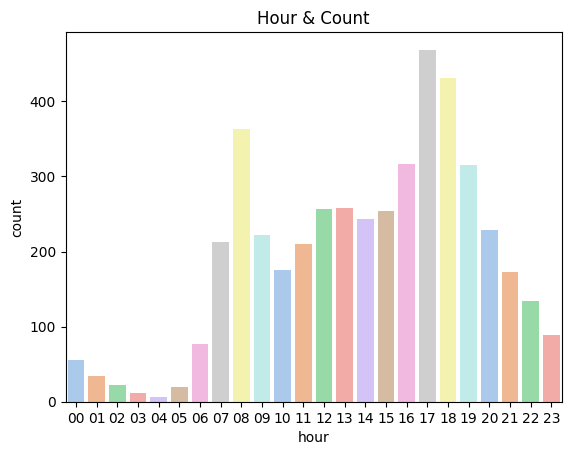

In [43]:
sns.barplot(x='hour',y='count',palette='pastel', data=hour_m)
plt.title('Hour & Count')
plt.xlabel('hour')
plt.ylabel('count')

출근(등교)시간대와 퇴근(하교)시간대가 높은 것을 알 수 있다. 특히 퇴근(하교)시간인 5시가 가장 큰 값을 갖는 것을 볼 수 있다.

## 수치형 자료
- temp, atemp, humidity, windspeed, casual, registered,

In [44]:
train.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886,10886,10886,10886,10886,10886
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456,2,12,19,24,7
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01,2012,05,01,12,Saturday
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,5464,912,575,456,1584
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
train_n = train[['temp','atemp','humidity','windspeed','casual','registered','count']]
train_n

,temp,atemp,humidity,windspeed,casual,registered,count
0,9.84,14.395,81,0.0000,3,13,16
1,9.02,13.635,80,0.0000,8,32,40
2,9.02,13.635,80,0.0000,5,27,32
3,9.84,14.395,75,0.0000,3,10,13
4,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329,336
10882,14.76,17.425,57,15.0013,10,231,241
10883,13.94,15.910,61,15.0013,4,164,168
10884,13.94,17.425,61,6.0032,12,117,129


<Axes: title={'center': 'Person Correlation of Features'}>

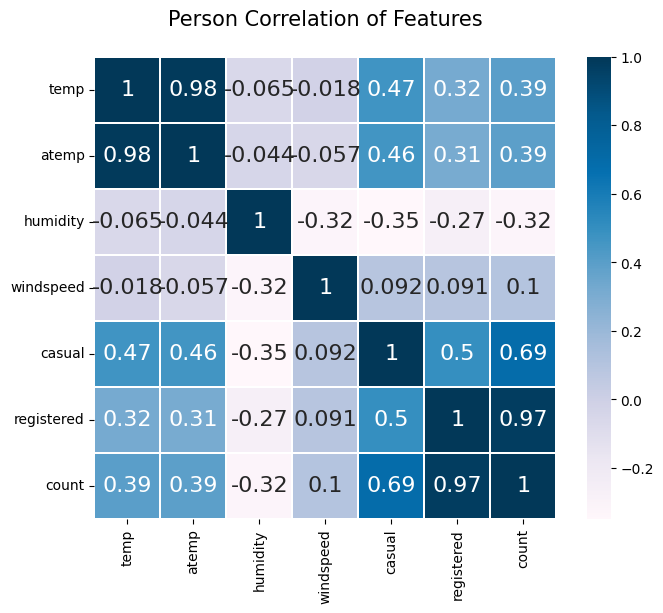

In [46]:
colormap = plt.cm.PuBu
plt.figure(figsize=(8, 6))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(train_n.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

- casual, registered는 사용자 대여 숫자이므로 당연히 count와 상관관계가 높기 때문에 제외한다.
- temp, atemp는 count와 양의 상관관계를 보여주고 humidity는 음의 상관관계를 보여준다.
- 습도의 경우 낮을 때 사람들이 많이 타기 때문에 이런 수치가 나오는 것 같아 보인다.

## Modeling

In [47]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

- season & month의 경우 모두 연관성 있는 데이터이므로 둘 중 하나만 사용
- workingday는 두개다 유사했으므로 삭제
- casual, registered는 count와 같은 값으로 볼 수 있으므로 삭제

In [49]:
train_1 = train.drop(['workingday','casual','registered'],axis=1)
train_1

,datetime,season,holiday,weather,temp,atemp,humidity,windspeed,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,1,9.84,14.395,81,0.0000,16,2011-01-01,2011,01,01,00,Saturday
1,2011-01-01 01:00:00,1,0,1,9.02,13.635,80,0.0000,40,2011-01-01,2011,01,01,01,Saturday
2,2011-01-01 02:00:00,1,0,1,9.02,13.635,80,0.0000,32,2011-01-01,2011,01,01,02,Saturday
3,2011-01-01 03:00:00,1,0,1,9.84,14.395,75,0.0000,13,2011-01-01,2011,01,01,03,Saturday
4,2011-01-01 04:00:00,1,0,1,9.84,14.395,75,0.0000,1,2011-01-01,2011,01,01,04,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,15.58,19.695,50,26.0027,336,2012-12-19,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,14.76,17.425,57,15.0013,241,2012-12-19,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,13.94,15.910,61,15.0013,168,2012-12-19,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,13.94,17.425,61,6.0032,129,2012-12-19,2012,12,19,22,Wednesday


In [50]:
train_1 = train_1.drop(['datetime','date'],axis=1)
train_1

,season,holiday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,1,9.84,14.395,81,0.0000,16,2011,01,01,00,Saturday
1,1,0,1,9.02,13.635,80,0.0000,40,2011,01,01,01,Saturday
2,1,0,1,9.02,13.635,80,0.0000,32,2011,01,01,02,Saturday
3,1,0,1,9.84,14.395,75,0.0000,13,2011,01,01,03,Saturday
4,1,0,1,9.84,14.395,75,0.0000,1,2011,01,01,04,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,15.58,19.695,50,26.0027,336,2012,12,19,19,Wednesday
10882,4,0,1,14.76,17.425,57,15.0013,241,2012,12,19,20,Wednesday
10883,4,0,1,13.94,15.910,61,15.0013,168,2012,12,19,21,Wednesday
10884,4,0,1,13.94,17.425,61,6.0032,129,2012,12,19,22,Wednesday


In [51]:
train_1.columns

Index(['season', 'holiday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

### season, weather, temp, atemp, humidity, windspeed, year, hour, weekday

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [54]:
model_1 = train_1[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'hour', 'weekday','count']]
model_1 = pd.get_dummies(model_1)
model_1

,season,weather,temp,atemp,humidity,windspeed,count,year_2011,year_2012,hour_00,...,hour_21,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,1,9.84,14.395,81,0.0000,16,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,9.02,13.635,80,0.0000,40,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,9.02,13.635,80,0.0000,32,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,9.84,14.395,75,0.0000,13,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,9.84,14.395,75,0.0000,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,336,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10882,4,1,14.76,17.425,57,15.0013,241,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10883,4,1,13.94,15.910,61,15.0013,168,0,1,0,...,1,0,0,0,0,0,0,0,0,1
10884,4,1,13.94,17.425,61,6.0032,129,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(model_1.drop('count', axis=1),
                                                    model_1['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_1_accuracy = accuracy_score(y_test, pred)
model_1_accuracy

0.019058553386911595

### month, weather, temp, atemp, humidity, windspeed, year, hour, weekday

In [58]:
model_2 = train_1[['month', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'hour', 'weekday','count']]
model_2 = pd.get_dummies(model_2)
model_2

,weather,temp,atemp,humidity,windspeed,count,month_01,month_02,month_03,month_04,...,hour_21,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,9.84,14.395,81,0.0000,16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,9.02,13.635,80,0.0000,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,9.02,13.635,80,0.0000,32,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,9.84,14.395,75,0.0000,13,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,9.84,14.395,75,0.0000,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1,15.58,19.695,50,26.0027,336,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10882,1,14.76,17.425,57,15.0013,241,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10883,1,13.94,15.910,61,15.0013,168,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10884,1,13.94,17.425,61,6.0032,129,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [59]:
X_train, X_test, y_train, y_test = train_test_split(model_2.drop('count', axis=1),
                                                    model_2['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_2_accuracy = accuracy_score(y_test, pred)
model_2_accuracy

0.016991963260619976

### 범주형 자료만

In [62]:
model_3 = train_1[['season','month', 'weather', 'year', 'hour','weekday','count']]
model_3 = pd.get_dummies(model_3)
model_3

,season,weather,count,month_01,month_02,month_03,month_04,month_05,month_06,month_07,...,hour_21,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,1,16,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,40,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,32,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,13,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,336,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10882,4,1,241,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10883,4,1,168,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10884,4,1,129,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [63]:
X_train, X_test, y_train, y_test = train_test_split(model_3.drop('count', axis=1),
                                                    model_3['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_3_accuracy = accuracy_score(y_test, pred)
model_3_accuracy

0.02732491389207807

### 수치형 자료만

In [64]:
model_4 = train_1[['temp', 'atemp', 'humidity', 'windspeed','count']]
model_4 = pd.get_dummies(model_4)
model_4

,temp,atemp,humidity,windspeed,count
0,9.84,14.395,81,0.0000,16
1,9.02,13.635,80,0.0000,40
2,9.02,13.635,80,0.0000,32
3,9.84,14.395,75,0.0000,13
4,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,336
10882,14.76,17.425,57,15.0013,241
10883,13.94,15.910,61,15.0013,168
10884,13.94,17.425,61,6.0032,129


In [65]:
X_train, X_test, y_train, y_test = train_test_split(model_4.drop('count', axis=1),
                                                    model_4['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_4_accuracy = accuracy_score(y_test, pred)
model_4_accuracy

0.008036739380022962

### 범주 + temp, atemp

In [66]:
model_5 = train_1[['season','month', 'weather', 'year', 'hour','weekday','count','temp','atemp']]
model_5 = pd.get_dummies(model_5)
model_5

,season,weather,count,temp,atemp,month_01,month_02,month_03,month_04,month_05,...,hour_21,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,1,16,9.84,14.395,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,40,9.02,13.635,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,32,9.02,13.635,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,13,9.84,14.395,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,9.84,14.395,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,336,15.58,19.695,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10882,4,1,241,14.76,17.425,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10883,4,1,168,13.94,15.910,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10884,4,1,129,13.94,17.425,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [67]:
X_train, X_test, y_train, y_test = train_test_split(model_5.drop('count', axis=1),
                                                    model_5['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_5_accuracy = accuracy_score(y_test, pred)
model_5_accuracy

0.023191733639494835

### 범주(month제외) + temp, atemp

In [68]:
model_6 = train_1[['season', 'weather', 'year', 'hour','weekday','count','temp','atemp']]
model_6 = pd.get_dummies(model_6)
model_6

,season,weather,count,temp,atemp,year_2011,year_2012,hour_00,hour_01,hour_02,...,hour_21,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,1,16,9.84,14.395,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,40,9.02,13.635,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,32,9.02,13.635,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,13,9.84,14.395,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,9.84,14.395,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,336,15.58,19.695,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10882,4,1,241,14.76,17.425,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10883,4,1,168,13.94,15.910,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10884,4,1,129,13.94,17.425,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [69]:
X_train, X_test, y_train, y_test = train_test_split(model_6.drop('count', axis=1),
                                                    model_6['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_6_accuracy = accuracy_score(y_test, pred)
model_6_accuracy

0.022962112514351322

### 범주(season)제외 + temp, atemp

In [70]:
model_7 = train_1[['month', 'weather', 'year', 'hour','weekday','count','temp','atemp']]
model_7 = pd.get_dummies(model_7)
model_7

,weather,count,temp,atemp,month_01,month_02,month_03,month_04,month_05,month_06,...,hour_21,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,16,9.84,14.395,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,40,9.02,13.635,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,32,9.02,13.635,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,13,9.84,14.395,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,9.84,14.395,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1,336,15.58,19.695,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10882,1,241,14.76,17.425,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10883,1,168,13.94,15.910,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10884,1,129,13.94,17.425,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [71]:
X_train, X_test, y_train, y_test = train_test_split(model_7.drop('count', axis=1),
                                                    model_7['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_7_accuracy = accuracy_score(y_test, pred)
model_7_accuracy

0.019977037887485647

In [72]:
print(model_1_accuracy)
print(model_2_accuracy)
print(model_3_accuracy)
print(model_4_accuracy)
print(model_5_accuracy)
print(model_6_accuracy)
print(model_7_accuracy)

0.019058553386911595
0.016991963260619976
0.02732491389207807
0.008036739380022962
0.023191733639494835
0.022962112514351322
0.019977037887485647


### season, month 비교

In [73]:
model_season = train_1[['season', 'count']]
model_season = pd.get_dummies(model_season)
model_season

,season,count
0,1,16
1,1,40
2,1,32
3,1,13
4,1,1
...,...,...
10881,4,336
10882,4,241
10883,4,168
10884,4,129


In [74]:
X_train, X_test, y_train, y_test = train_test_split(model_season.drop('count', axis=1),
                                                    model_season['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_season_accuracy = accuracy_score(y_test, pred)
model_season_accuracy

0.018828932261768083

In [75]:
model_month = train_1[['month', 'count']]
model_month = pd.get_dummies(model_month)
model_month

,count,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,16,1,0,0,0,0,0,0,0,0,0,0,0
1,40,1,0,0,0,0,0,0,0,0,0,0,0
2,32,1,0,0,0,0,0,0,0,0,0,0,0
3,13,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,336,0,0,0,0,0,0,0,0,0,0,0,1
10882,241,0,0,0,0,0,0,0,0,0,0,0,1
10883,168,0,0,0,0,0,0,0,0,0,0,0,1
10884,129,0,0,0,0,0,0,0,0,0,0,0,1


In [76]:
X_train, X_test, y_train, y_test = train_test_split(model_month.drop('count', axis=1),
                                                    model_month['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_month_accuracy = accuracy_score(y_test, pred)
model_month_accuracy

0.017451205510907005

In [77]:
model_sm = train_1[['season','month', 'count']]
model_sm = pd.get_dummies(model_sm)
model_sm

,season,count,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,1,16,1,0,0,0,0,0,0,0,0,0,0,0
1,1,40,1,0,0,0,0,0,0,0,0,0,0,0
2,1,32,1,0,0,0,0,0,0,0,0,0,0,0
3,1,13,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,336,0,0,0,0,0,0,0,0,0,0,0,1
10882,4,241,0,0,0,0,0,0,0,0,0,0,0,1
10883,4,168,0,0,0,0,0,0,0,0,0,0,0,1
10884,4,129,0,0,0,0,0,0,0,0,0,0,0,1


In [78]:
X_train, X_test, y_train, y_test = train_test_split(model_sm.drop('count', axis=1),
                                                    model_sm['count'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_sm_accuracy = accuracy_score(y_test, pred)
model_sm_accuracy

0.017451205510907005

범주형 자료만 있을 경우가 가장 높은 값을 가졌고, 그 다음으로는 범주형자료(month제외)+temp, atemp와 범주형자료(season제외)+temp, atemp의 값이 높은 것으로 나온걸 보면 범주형자료가 count와 연관이 있는 feature로 볼 수 있다. 또한 범주형 자료에서 month feature을 사용하는 것보다 season feature를 사용하는 것이 더 좋아 보인다.